In [304]:
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [327]:
# import some data to play with
iris = datasets.load_iris()

X = iris.data[:, :3].T
y = iris.target.T

train_n = int(X.shape[1] * 2 / 3)

X_train = X[:, :train_n]
y_train = iris.target[:train_n]

X_test = X[:, train_n:]
y_test = iris.target[train_n:]

m = X_train.shape[1]

In [320]:
print("X.shape = " + str(X.shape))
print("y.shape = " + str(y.shape))

print("X_train.shape = " + str(X_train.shape))
print("y_train.shape = " + str(y_train.shape))

print("X_test.shape = " + str(X_test.shape))
print("y_test.shape = " + str(y_test.shape))

print("m = " + str(m))

print("X = " +str(y))
print("X = " +str(y_train))
print("X = " +str(y_test))

X.shape = (3, 150)
y.shape = (150,)
X_train.shape = (3, 100)
y_train.shape = (100,)
X_test.shape = (3, 50)
y_test.shape = (50,)
m = 100
X = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
X = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
X = [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [307]:
# Initialize parameters
def initialize_parameters(dim):
    w = np.zeros((dim, 1), dtype=float)
    b = 0.
    params = {"w": w, "b": b}
    return params

In [270]:
dim = 2
params = initialize_parameters(dim)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))

w = [[0.]
 [0.]]
b = 0.0


In [308]:
# Define Sigmoid Function
def sigmoid(Z):
    return 1. / (1 + np.exp(-Z)) 

In [272]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))
# sigmoid([0, 2]) = [0.5        0.88079708]

sigmoid([0, 2]) = [0.5        0.88079708]


In [309]:
# Forward Propagation
def forward_propagation (X, params):
    Z = np.dot(params["w"].T, X) + params["b"]
    return sigmoid(Z)
#print("A" + str(A))

In [310]:
# Cost Function
def cost_function(m, y, A):
    return - 1. / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

In [311]:
# Backward Propagation
def backward_propagation(A, X, Y):
    dZ =  A - Y
    dw = 1. / m * np.dot(X, dZ.T)
    db = 1. / m * np.sum(dZ)
    grads = {"dw": dw,
             "db": db}
    return grads

In [261]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
params = {"w": w, "b": b}
print(X)
print(Y)
A = forward_propagation(X, params)
print(A)
m = X.shape[1]
cost = cost_function(m, Y, A)
grads = backward_propagation(A, X, Y)

print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

# dw = [[ 0.99845601]
# [ 2.39507239]]
# db = 0.00145557813678
# cost = 5.80154531939

[[ 1.   2.  -1. ]
 [ 3.   4.  -3.2]]
[[1 0 1]]
[[0.99987661 0.99999386 0.00449627]]
dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [312]:
def update_parameters(w, b, grads, learning_rate):
    w = w - learning_rate * grads["dw"]
    b = b - learning_rate * grads["db"]
    params = {"w": w, "b": b}
    return params

In [313]:
def model_linear_regression(X, Y, learning_rate = 0.075, iterations = 100):
    m = X.shape[1]
    dim = X.shape[0]
    params = initialize_parameters(dim)
    costs = []
    
    for i in range(iterations):
        A = forward_propagation (X, params)
        costs.append(cost_function(m, Y, A))
        grads = backward_propagation(A, X, Y)
        params = update_parameters(params["w"], params["b"], grads, learning_rate)
        
    return params, grads, costs    

In [337]:
# Model linear regression
learning_rate = 0.009
iterations = 100
params, grads, co = model_linear_regression(X_train, y_train, learning_rate, iterations)

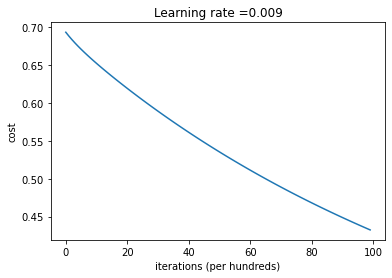

In [338]:
# Plot learning curve (with costs)
costs = np.squeeze(co)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

In [339]:
def predict(X, params):
    m = X.shape[1]
    A = forward_propagation (X, params)
    result = np.zeros((1, m))
    for i in range(A.shape[1]):
        if A[0,i] > 0.5:
            result[0,i] = 1
        else:
            result[0,i] = 0
            
    return result

In [330]:
w_test = np.array([[0.1124579],[0.23106775]])
b_test = -0.3
params_test = {"w": w_test, "b": b_test}
X_t = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
res = predict(X_t, params_test)

print ("predictions = " + str(res))

predictions = [[1. 1. 0.]]


In [340]:
predictions_train = predict(X_train, params)
predictions_test = predict(X_test, params)

y_binary = np.where(y_train > 0.5, 1, 0)
y_binary_test = np.where(y_test > 0.5, 1, 0)

# Print train/test Errors
print("train accuracy: {} %".format(100 - np.mean(np.abs(predictions_train - y_binary)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(predictions_test - y_binary_test)) * 100))

train accuracy: 100.0 %
test accuracy: 100.0 %
